In [1]:
%load_ext autoreload
%autoreload 2

import match

import matplotlib.pyplot as plt
from jupyterthemes import jtplot

jtplot.style(context="talk")

In [2]:
def plot(x, yt=None, yp=None, ypl=None):
    if yt:
        plt.plot(x.T.data.data[0], yt.T.data.data[0], label="Target")
    if yp:
        ypl = "Prediction" if not ypl else ypl
        plt.plot(x.T.data.data[0], yp.T.data.data[0], linestyle="--", label=ypl)
    plt.legend()

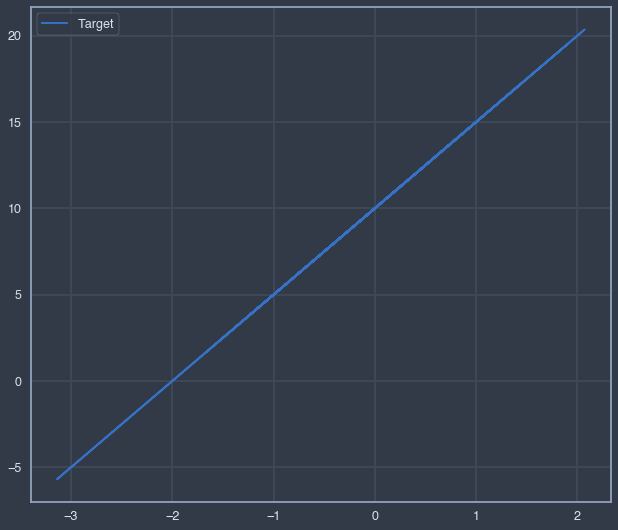

In [3]:
n = 50
d = 1

x = match.randn(n, d)  # uniform
y_targ = x * 5 + 10
plot(x, y_targ)

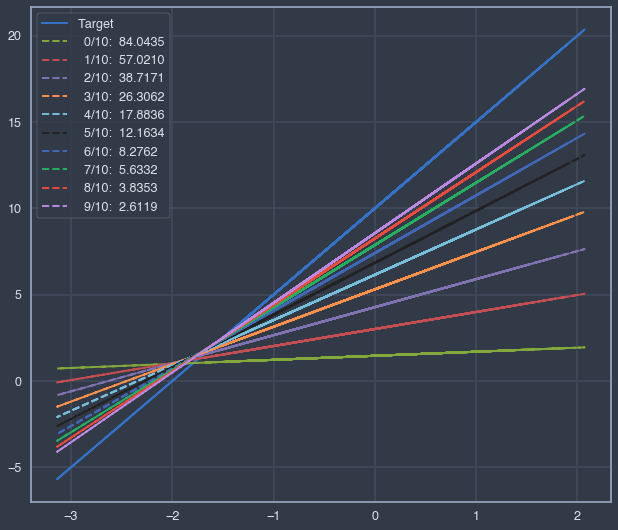

In [4]:
plot(x, y_targ)

num_epochs = 10
learning_rate = 0.1

loss_fcn = match.nn.MSELoss()
model = match.nn.Linear(1, 1)

for epoch in range(num_epochs):
    y_pred = model(x)
    loss = loss_fcn(y_pred, y_targ)
    
    plot(x, yp=y_pred, ypl=f"{epoch:>3}/{num_epochs}: {loss}")

    model.zero_grad()
    loss.backward()
    
    for param in model.parameters():
        param.data = param.data - learning_rate * param.grad

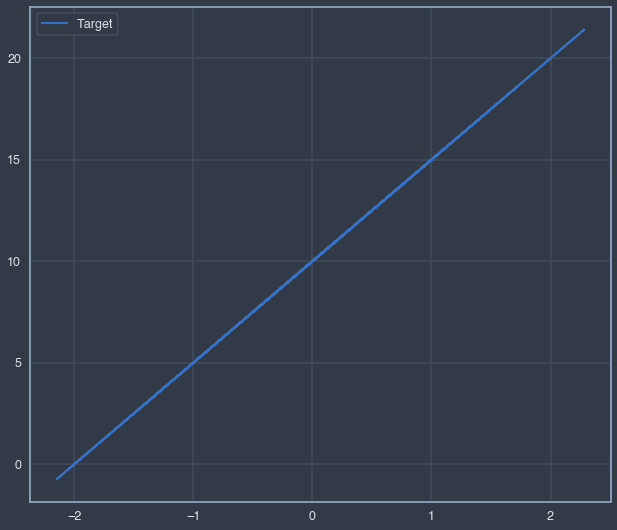

In [5]:
n = 50
d = 2

x = match.randn(n, d)  # uniform
y_targ = x * 5 + 10
plot(x, y_targ)